## Doesn't work with FV3

In [1]:
import logging
import pdb
from pathlib import Path

import cartopy
import cmaps
import holoviews as hv
import numpy as np
import pandas as pd
import uxarray
import xarray

try:  # Avoid ValueError when assigning cmap again
    cmap = cmaps.WhiteBlueGreenYellowRed
except ValueError:
    pass

import geoviews.feature as gf
from hwt import helicityThresholds, mpas, xtime

In [10]:
uxarray.__version__

'2024.10.2.dev183+ga0b6361a.d20250317'

In [11]:
found_paths = [path for path in sys.path if "uxarray" in path]
print("Possible uxarray locations:", found_paths)


Possible uxarray locations: ['/glade/work/ahijevyc/conda-envs/uxarray/lib/python312.zip', '/glade/work/ahijevyc/conda-envs/uxarray/lib/python3.12', '/glade/work/ahijevyc/conda-envs/uxarray/lib/python3.12/lib-dynload', '/glade/work/ahijevyc/conda-envs/uxarray/lib/python3.12/site-packages', '/glade/work/ahijevyc/conda-envs/uxarray/lib/python3.12/site-packages/setuptools/_vendor']


In [12]:
v = "updraft_helicity_max"
lon_bounds = (-95, -86)
lat_bounds = (36, 45)
hv.extension("matplotlib")

features = gf.coastline(projection=cartopy.crs.PlateCarree(), scale="50m") * gf.states(
    projection=cartopy.crs.PlateCarree(), scale="50m"
)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [13]:
%%time
grid_path = "/glade/campaign/mmm/parc/schwartz/MPAS/15-3km_mesh/mpas_init/static.nc"

# Multiple thresholds for updraft helicity
lead_time_days = range(2)
forecast_hours = range(13, 37, 6)
valid_date = pd.to_datetime("20240521")
oneday = pd.to_timedelta(1, unit="day")

CPU times: user 3.97 ms, sys: 22 μs, total: 3.99 ms
Wall time: 290 ms


In [14]:
model = mpas
mpas.v = "updraft_helicity_max03"
assert model.name != "fv3", (
    "can't read fv3 cubed sphere nest yet.\n"
    "TODO:\n"
    "sfc and atmos variables split between two files "
    "atmos_sos*.nest02_%Y_%m_%d_%H.tile7.nc\n"
    "time dimension called time\n"
    "grid_xt = T-cell longitude\n"
    "grid_yt = T-cell latitude\n"
)

# Create list of input files
# This is a nested list comprehension, looping through
# forecast_hours (iterable of forecast hours)
#    lead_time_days (iterable of lead times in days)
#        members (1 through model.nmem)
fmt = "diag.%Y-%m-%d_%H.%M.%S.nc"
ifiles = [
    Path(f"/glade/campaign/mmm/parc/schwartz/HWT2024/{model}")
    / (valid_date - lead_time_day * oneday).strftime("%Y%m%d%H")
    / "post"
    / f"mem_{mem}"
    / (valid_date + pd.to_timedelta(fhr, unit="hour")).strftime(fmt)
    for mem in range(1, model.nmem + 1)
    for lead_time_day in lead_time_days
    for fhr in forecast_hours
]
print(f"open {len(ifiles)} files")

print(ifiles[0:10])
ds0 = xarray.open_mfdataset(
    ifiles,
    preprocess=xtime,
    combine_attrs="drop_conflicts",
)

uxds = uxarray.open_mfdataset(
    grid_path,
    ifiles,
    preprocess=xtime,
)
uxds

open 40 files
[PosixPath('/glade/campaign/mmm/parc/schwartz/HWT2024/mpas/2024052100/post/mem_1/diag.2024-05-21_13.00.00.nc'), PosixPath('/glade/campaign/mmm/parc/schwartz/HWT2024/mpas/2024052100/post/mem_1/diag.2024-05-21_19.00.00.nc'), PosixPath('/glade/campaign/mmm/parc/schwartz/HWT2024/mpas/2024052100/post/mem_1/diag.2024-05-22_01.00.00.nc'), PosixPath('/glade/campaign/mmm/parc/schwartz/HWT2024/mpas/2024052100/post/mem_1/diag.2024-05-22_07.00.00.nc'), PosixPath('/glade/campaign/mmm/parc/schwartz/HWT2024/mpas/2024052000/post/mem_1/diag.2024-05-21_13.00.00.nc'), PosixPath('/glade/campaign/mmm/parc/schwartz/HWT2024/mpas/2024052000/post/mem_1/diag.2024-05-21_19.00.00.nc'), PosixPath('/glade/campaign/mmm/parc/schwartz/HWT2024/mpas/2024052000/post/mem_1/diag.2024-05-22_01.00.00.nc'), PosixPath('/glade/campaign/mmm/parc/schwartz/HWT2024/mpas/2024052000/post/mem_1/diag.2024-05-22_07.00.00.nc'), PosixPath('/glade/campaign/mmm/parc/schwartz/HWT2024/mpas/2024052100/post/mem_2/diag.2024-05-21_1

<xarray.UxDataset> Size: 65GB
Dimensions:                 (valid_time: 4, mem: 5, initial_time: 2,
                             n_face: 6488066, nSoilLevels: 4)
Coordinates:
  * initial_time            (initial_time) datetime64[ns] 16B 2024-05-20 2024...
  * mem                     (mem) int64 40B 1 2 3 4 5
  * valid_time              (valid_time) datetime64[ns] 32B 2024-05-21T13:00:...
Dimensions without coordinates: n_face, nSoilLevels
Data variables: (12/62)
    cldfrac_high_UPP        (valid_time, mem, initial_time, n_face) float32 1GB dask.array<chunksize=(1, 1, 1, 926867), meta=np.ndarray>
    cldfrac_low_UPP         (valid_time, mem, initial_time, n_face) float32 1GB dask.array<chunksize=(1, 1, 1, 926867), meta=np.ndarray>
    cldfrac_mid_UPP         (valid_time, mem, initial_time, n_face) float32 1GB dask.array<chunksize=(1, 1, 1, 926867), meta=np.ndarray>
    cldfrac_tot_UPP         (valid_time, mem, initial_time, n_face) float32 1GB dask.array<chunksize=(1, 1, 1, 926867), meta=np.ndarray>
    dewpoint_surface        (valid_time, mem, initial_time, n_face) float32 1GB dask.array<chunksize=(1, 1, 1, 926867), meta=np.ndarray>
    glw                     (valid_time, mem, initial_time, n_face) float32 1GB dask.array<chunksize=(1, 1, 1, 926867), meta=np.ndarray>
    ...                      ...
    vshr06                  (valid_time, mem, initial_time, n_face) float32 1GB dask.array<chunksize=(1, 1, 1, 926867), meta=np.ndarray>
    w_velocity_max          (valid_time, mem, initial_time, n_face) float32 1GB dask.array<chunksize=(1, 1, 1, 926867), meta=np.ndarray>
    w_velocity_min          (valid_time, mem, initial_time, n_face) float32 1GB dask.array<chunksize=(1, 1, 1, 926867), meta=np.ndarray>
    wind_speed_10m_max      (valid_time, mem, initial_time, n_face) float32 1GB dask.array<chunksize=(1, 1, 1, 926867), meta=np.ndarray>
    xtime                   (valid_time, mem, initial_time) |S64 3kB b'2024-0...
    forecastHour            (valid_time, mem, initial_time) float64 320B 37.0...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

CPU times: user 2min 17s, sys: 25.1 s, total: 2min 42s
Wall time: 3min 51s


:Layout
   .Overlay.I    :Overlay
      .Image.I     :Image   [x,y]   (x_y updraft_helicity_max_24h)
      .Coastline.I :Feature   [Longitude,Latitude]
      .States.I    :Feature   [Longitude,Latitude]
      .Scatter.I   :Scatter   [Lon]   (Lat)
   .Overlay.II   :Overlay
      .Image.I     :Image   [x,y]   (x_y updraft_helicity_max_24h)
      .Coastline.I :Feature   [Longitude,Latitude]
      .States.I    :Feature   [Longitude,Latitude]
      .Scatter.I   :Scatter   [Lon]   (Lat)
   .Overlay.III  :Overlay
      .Image.I     :Image   [x,y]   (x_y updraft_helicity_max_24h)
      .Coastline.I :Feature   [Longitude,Latitude]
      .States.I    :Feature   [Longitude,Latitude]
      .Scatter.I   :Scatter   [Lon]   (Lat)
   .Overlay.IV   :Overlay
      .Image.I     :Image   [x,y]   (x_y updraft_helicity_max_24h)
      .Coastline.I :Feature   [Longitude,Latitude]
      .States.I    :Feature   [Longitude,Latitude]
      .Scatter.I   :Scatter   [Lon]   (Lat)
   .Overlay.V    :Overlay
      .Image.I     :Image   [x,y]   (x_y updraft_helicity_max_24h)
      .Coastline.I :Feature   [Longitude,Latitude]
      .States.I    :Feature   [Longitude,Latitude]
      .Scatter.I   :Scatter   [Lon]   (Lat)
   .Overlay.VI   :Overlay
      .Image.I     :Image   [x,y]   (x_y updraft_helicity_max_24h)
      .Coastline.I :Feature   [Longitude,Latitude]
      .States.I    :Feature   [Longitude,Latitude]
      .Scatter.I   :Scatter   [Lon]   (Lat)
   .Overlay.VII  :Overlay
      .Image.I     :Image   [x,y]   (x_y updraft_helicity_max_24h)
      .Coastline.I :Feature   [Longitude,Latitude]
      .States.I    :Feature   [Longitude,Latitude]
      .Scatter.I   :Scatter   [Lon]   (Lat)
   .Overlay.VIII :Overlay
      .Image.I     :Image   [x,y]   (x_y updraft_helicity_max_24h)
      .Coastline.I :Feature   [Longitude,Latitude]
      .States.I    :Feature   [Longitude,Latitude]
      .Scatter.I   :Scatter   [Lon]   (Lat)
   .Overlay.IX   :Overlay
      .Image.I     :Image   [x,y]   (x_y updraft_helicity_max_24h)
      .Coastline.I :Feature   [Longitude,Latitude]
      .States.I    :Feature   [Longitude,Latitude]
      .Scatter.I   :Scatter   [Lon]   (Lat)
   .Overlay.X    :Overlay
      .Image.I     :Image   [x,y]   (x_y updraft_helicity_max_24h)
      .Coastline.I :Feature   [Longitude,Latitude]
      .States.I    :Feature   [Longitude,Latitude]
      .Scatter.I   :Scatter   [Lon]   (Lat)
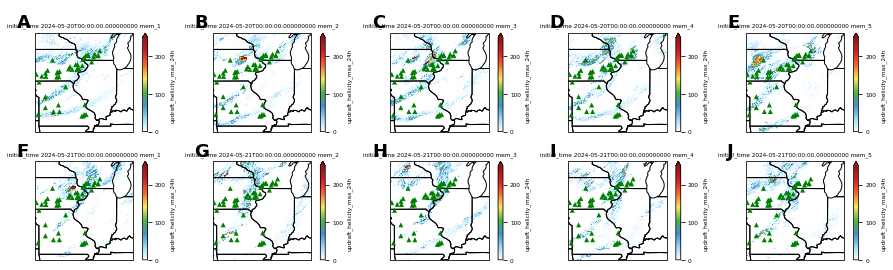

In [15]:
%%time
hv.extension("matplotlib")

# maximum value for all times
# fixed subset.bounding_box so it does not lose mem and initial_time coordinate indices.
uh_24hmax = (
    uxds[v].subset.bounding_box(lon_bounds, lat_bounds).metpy.quantify().max(dim="valid_time")
)
uh_24hmax.name += "_24h"


rpt_type = "hail"
opts = {}
opts["torn"] = dict(color="red", marker="v")
opts["hail"] = dict(color="green", marker="^")
opts["wind"] = dict(color="blue", marker="s")
rpts = pd.read_csv(
    f"https://www.spc.noaa.gov/climo/reports/{valid_date.strftime('%y%m%d')}_rpts_{rpt_type}.csv"
)

# Time is an integer with hours in the thousands and hundreds place and minutes
# in the tens and ones places.
# Extract hours from time by dividing by 100 and converting result to integer.
rpts["h"] = (rpts.Time / 100).astype(int)
# Time window of spc reports is from 12 UTC on the current day to 12 UTC the next day.
# If hours is less than 12, it is from the next day. Therefore, add 24.
rpts.loc[rpts["h"] < 12, "h"] += 24
rpts["minutes"] = rpts.Time % 100
rpts["valid_time"] = (
    valid_date
    + pd.to_timedelta(rpts["h"], unit="h")
    + pd.to_timedelta(rpts["minutes"], unit="minute")
)
irange = rpts.Lat.between(*lat_bounds) & rpts.Lon.between(*lon_bounds)
logging.warning(f"{irange.sum()}/{len(rpts)} {rpt_type} rpts in bounds")
rpts = rpts[irange]

scatter = hv.Scatter(rpts[["Lon", "Lat"]]).opts(s=25, edgecolor="none", **opts[rpt_type])

title = valid_date
p_list = [
    uh_24hmax.sel(mem=mem)
    .sel(initial_time=initial_time)
    .copy()  # or else all panels are same as last in list
    .plot.polygons(
        rasterize=True,
        title=f"initial_time {initial_time} mem_{mem}",
        cmap=cmap,
        clim=(0, 250),
        backend="matplotlib",
    )
    .opts(
        fontsize={
            "title": "xx-small",
            "xticks": "xx-small",
            "yticks": "xx-small",
            "labels": "xx-small",
        },
        backend_opts={"colorbar.ax.get_yticklabels().fontsize": "xx-small"},
    )
    * features
    * scatter
    for initial_time in uh_24hmax.initial_time.data
    for mem in uh_24hmax.mem.data
]
layout = hv.Layout(p_list).cols(model.nmem)
layout.opts(fig_size=64)

CPU times: user 11.9 s, sys: 1.01 s, total: 12.9 s
Wall time: 20.3 s


:Layout
   .Overlay.I    :Overlay
      .Image.I     :Image   [x,y]   (x_y updraft_helicity_max_24h)
      .Coastline.I :Feature   [Longitude,Latitude]
      .States.I    :Feature   [Longitude,Latitude]
      .Scatter.I   :Scatter   [Lon]   (Lat)
   .Overlay.II   :Overlay
      .Image.I     :Image   [x,y]   (x_y updraft_helicity_max_24h)
      .Coastline.I :Feature   [Longitude,Latitude]
      .States.I    :Feature   [Longitude,Latitude]
      .Scatter.I   :Scatter   [Lon]   (Lat)
   .Overlay.III  :Overlay
      .Image.I     :Image   [x,y]   (x_y updraft_helicity_max_24h)
      .Coastline.I :Feature   [Longitude,Latitude]
      .States.I    :Feature   [Longitude,Latitude]
      .Scatter.I   :Scatter   [Lon]   (Lat)
   .Overlay.IV   :Overlay
      .Image.I     :Image   [x,y]   (x_y updraft_helicity_max_24h)
      .Coastline.I :Feature   [Longitude,Latitude]
      .States.I    :Feature   [Longitude,Latitude]
      .Scatter.I   :Scatter   [Lon]   (Lat)
   .Overlay.V    :Overlay
      .Image.I     :Image   [x,y]   (x_y updraft_helicity_max_24h)
      .Coastline.I :Feature   [Longitude,Latitude]
      .States.I    :Feature   [Longitude,Latitude]
      .Scatter.I   :Scatter   [Lon]   (Lat)
   .Overlay.VI   :Overlay
      .Image.I     :Image   [x,y]   (x_y updraft_helicity_max_24h)
      .Coastline.I :Feature   [Longitude,Latitude]
      .States.I    :Feature   [Longitude,Latitude]
      .Scatter.I   :Scatter   [Lon]   (Lat)
   .Overlay.VII  :Overlay
      .Image.I     :Image   [x,y]   (x_y updraft_helicity_max_24h)
      .Coastline.I :Feature   [Longitude,Latitude]
      .States.I    :Feature   [Longitude,Latitude]
      .Scatter.I   :Scatter   [Lon]   (Lat)
   .Overlay.VIII :Overlay
      .Image.I     :Image   [x,y]   (x_y updraft_helicity_max_24h)
      .Coastline.I :Feature   [Longitude,Latitude]
      .States.I    :Feature   [Longitude,Latitude]
      .Scatter.I   :Scatter   [Lon]   (Lat)
   .Overlay.IX   :Overlay
      .Image.I     :Image   [x,y]   (x_y updraft_helicity_max_24h)
      .Coastline.I :Feature   [Longitude,Latitude]
      .States.I    :Feature   [Longitude,Latitude]
      .Scatter.I   :Scatter   [Lon]   (Lat)
   .Overlay.X    :Overlay
      .Image.I     :Image   [x,y]   (x_y updraft_helicity_max_24h)
      .Coastline.I :Feature   [Longitude,Latitude]
      .States.I    :Feature   [Longitude,Latitude]
      .Scatter.I   :Scatter   [Lon]   (Lat)
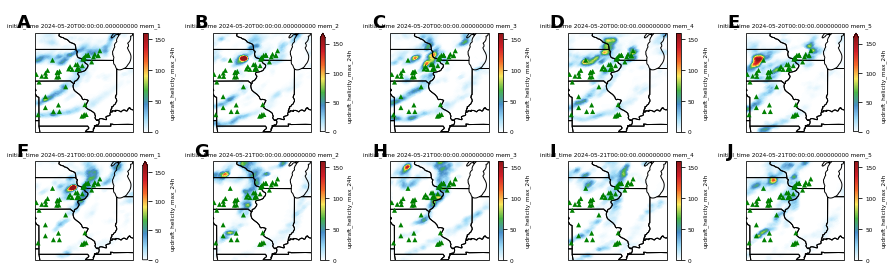

In [16]:
%%time
da = uh_24hmax.remap.inverse_distance_weighted(
    uh_24hmax.uxgrid,
    remap_to="face centers",
    power=0,
    k=169,
)
p_list = [
    da.sel(mem=mem)
    .sel(initial_time=initial_time)
    .copy()  # or else all panel data are same as last in list
    .plot.polygons(
        rasterize="true",
        title=f"initial_time {initial_time} mem_{mem}",
        cmap=cmap,
        clim=(0, 160),
        backend="matplotlib",
    )
    .opts(
        fontsize={
            "title": "xx-small",
            "xticks": "xx-small",
            "yticks": "xx-small",
            "labels": "xx-small",
        },
        backend_opts={"colorbar.ax.get_yticklabels().fontsize": "xx-small"},
    )
    * features
    * scatter
    for initial_time in uh_24hmax.initial_time.data
    for mem in uh_24hmax.mem.data
]
layout = hv.Layout(p_list).cols(model.nmem)
layout.opts(fig_size=64)

CPU times: user 3.11 s, sys: 432 ms, total: 3.55 s
Wall time: 4.44 s


:Layout
   .Overlay.I    :Overlay
      .Image.I     :Image   [x,y]   (x_y updraft_helicity_max_24h)
      .Coastline.I :Feature   [Longitude,Latitude]
      .States.I    :Feature   [Longitude,Latitude]
      .Scatter.I   :Scatter   [Lon]   (Lat)
   .Overlay.II   :Overlay
      .Image.I     :Image   [x,y]   (x_y updraft_helicity_max_24h)
      .Coastline.I :Feature   [Longitude,Latitude]
      .States.I    :Feature   [Longitude,Latitude]
      .Scatter.I   :Scatter   [Lon]   (Lat)
   .Overlay.III  :Overlay
      .Image.I     :Image   [x,y]   (x_y updraft_helicity_max_24h)
      .Coastline.I :Feature   [Longitude,Latitude]
      .States.I    :Feature   [Longitude,Latitude]
      .Scatter.I   :Scatter   [Lon]   (Lat)
   .Overlay.IV   :Overlay
      .Image.I     :Image   [x,y]   (x_y updraft_helicity_max_24h)
      .Coastline.I :Feature   [Longitude,Latitude]
      .States.I    :Feature   [Longitude,Latitude]
      .Scatter.I   :Scatter   [Lon]   (Lat)
   .Overlay.V    :Overlay
      .Image.I     :Image   [x,y]   (x_y updraft_helicity_max_24h)
      .Coastline.I :Feature   [Longitude,Latitude]
      .States.I    :Feature   [Longitude,Latitude]
      .Scatter.I   :Scatter   [Lon]   (Lat)
   .Overlay.VI   :Overlay
      .Image.I     :Image   [x,y]   (x_y updraft_helicity_max_24h)
      .Coastline.I :Feature   [Longitude,Latitude]
      .States.I    :Feature   [Longitude,Latitude]
      .Scatter.I   :Scatter   [Lon]   (Lat)
   .Overlay.VII  :Overlay
      .Image.I     :Image   [x,y]   (x_y updraft_helicity_max_24h)
      .Coastline.I :Feature   [Longitude,Latitude]
      .States.I    :Feature   [Longitude,Latitude]
      .Scatter.I   :Scatter   [Lon]   (Lat)
   .Overlay.VIII :Overlay
      .Image.I     :Image   [x,y]   (x_y updraft_helicity_max_24h)
      .Coastline.I :Feature   [Longitude,Latitude]
      .States.I    :Feature   [Longitude,Latitude]
      .Scatter.I   :Scatter   [Lon]   (Lat)
   .Overlay.IX   :Overlay
      .Image.I     :Image   [x,y]   (x_y updraft_helicity_max_24h)
      .Coastline.I :Feature   [Longitude,Latitude]
      .States.I    :Feature   [Longitude,Latitude]
      .Scatter.I   :Scatter   [Lon]   (Lat)
   .Overlay.X    :Overlay
      .Image.I     :Image   [x,y]   (x_y updraft_helicity_max_24h)
      .Coastline.I :Feature   [Longitude,Latitude]
      .States.I    :Feature   [Longitude,Latitude]
      .Scatter.I   :Scatter   [Lon]   (Lat)
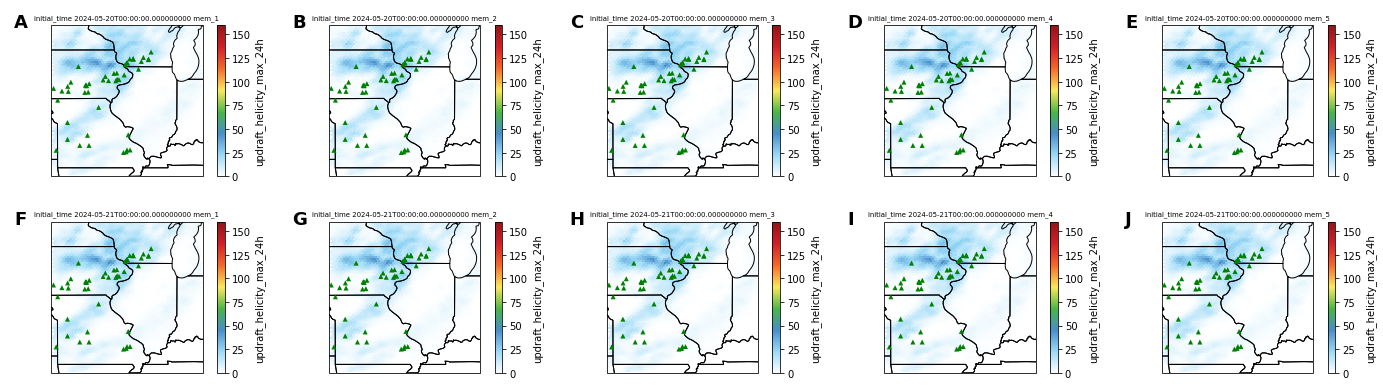

In [17]:
%%time
coarse_mesh_path = Path(
    "/glade/campaign/mmm/parc/schwartz/"
    "MPAS_regional/15km_mesh_regional/mpas_init/regional_15km_mesh_2000km.static.nc"
)
coarse_mesh = uxarray.open_grid(coarse_mesh_path).subset.bounding_box(lon_bounds, lat_bounds)

da = uh_24hmax.remap.inverse_distance_weighted(coarse_mesh).neighborhood_filter(
    r=20.0 / 111.0, func=np.mean
)
p_list = [
    da.sel(mem=mem)
    .sel(initial_time=initial_time)
    .compute().copy(deep=True)  # TODO: Get this working. Still shows identical panels
    .plot.polygons(
        rasterize=True,
        title=f"initial_time {initial_time} mem_{mem}",
        cmap=cmap,
        clim=(0, 160),
        backend="matplotlib",
    )
    .opts(fontsize='x-small')
    * features
    * scatter
    for initial_time in uh_24hmax.initial_time.data
    for mem in uh_24hmax.mem.data
]
layout = hv.Layout(p_list).cols(model.nmem)
layout.opts(fig_size=100)

:Layout
   .Overlay.I  :Overlay
      .Image.I     :Image   [x,y]   (x_y ens prob of 40+ updraft_helicity_max_24h w/in 20.0 km)
      .Coastline.I :Feature   [Longitude,Latitude]
      .States.I    :Feature   [Longitude,Latitude]
      .Scatter.I   :Scatter   [Lon]   (Lat)
   .Overlay.II :Overlay
      .Image.I     :Image   [x,y]   (x_y ens prob of 40+ updraft_helicity_max_24h w/in 20.0 km)
      .Coastline.I :Feature   [Longitude,Latitude]
      .States.I    :Feature   [Longitude,Latitude]
      .Scatter.I   :Scatter   [Lon]   (Lat)
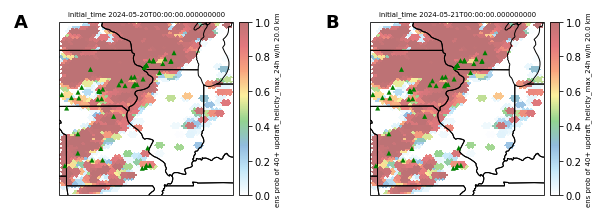

In [20]:
uh_thresh = helicityThresholds.metpy.quantify()[3]

r = 20.0
fy = (
    (uh_24hmax >= uh_thresh)
    .remap.inverse_distance_weighted(coarse_mesh)
    .neighborhood_filter(r=r / 111.0, func=np.max)
)

fy = fy.mean(dim="mem")
fy.name = f"ens prob of {uh_thresh.values}+ {uh_24hmax.name} w/in {r} km"

values = fy.values
values[values > 1] = 1
fy.values = values
assert fy.max() <= 1
p_list = [
    fy.sel(initial_time=initial_time)
    .copy(deep=True)
    .plot.polygons(
        rasterize=True,
        title=f"initial_time {initial_time}",
        cmap=cmap,
        # norm=matplotlib.colors.BoundaryNorm(
        #    boundaries=np.arange(-0.5 / model.nmem, 1 + 0.5 / model.nmem, 1 / model.nmem),
        #    ncolors=256,
        # ),
        backend="matplotlib",
    )
    .opts(fontsize={"title": "x-small", "labels": "x-small"}, alpha=0.6)
    * features
    * scatter
    for initial_time in fy.initial_time.data
]
layout = hv.Layout(p_list).cols(fy.initial_time.size)
layout

In [21]:
verify_fine_mesh = False
if verify_fine_mesh:
    prob_thresh = 0.4
    fy = uxarray.UxDataArray((fy >= prob_thresh).astype(int), uxgrid=coarse_mesh)
    fy.name = f"ensemble probability of {uh_thresh}+ {uh_24hmax.name} >= {prob_thresh}"
    fy = fy.remap.nearest_neighbor(uh_24hmax.uxgrid)
    fy = uxarray.UxDataArray(fy, uxgrid=uh_24hmax.uxgrid)

    p_list = [
        fy.sel(initial_time=initial_time).plot.rasterize(
            method="polygon",
            exclude_antimeridian=True,
            backend="matplotlib",
        )
        * features
        for initial_time in fy.initial_time.data
    ]
    layout = hv.Layout(p_list).cols(fy.initial_time.size)
    layout.opts(fig_size=250)

In [22]:
fy

<xarray.UxDataArray 'ens prob of 40+ updraft_helicity_max_24h w/in 20.0 km' (
                                                                             initial_time: 2,
                                                                             n_face: 3799)> Size: 61kB
array([[0.0343991 , 0.        , 0.99120893, ..., 0.        , 0.        ,
        0.        ],
       [0.0343991 , 0.        , 0.99120893, ..., 0.        , 0.        ,
        0.        ]])
Coordinates:
  * initial_time  (initial_time) datetime64[ns] 16B 2024-05-20 2024-05-21
Dimensions without coordinates: n_face

In [23]:
# reduce initialization time dimension.
# could be max. could be mean..
fy = fy.mean(dim="initial_time")


uxtree = coarse_mesh.get_ball_tree(coordinates="face centers")
rptdist = 40  # km
# get indices close to report (for each report)
idx = uxtree.query_radius(rpts[["Lon", "Lat"]], rptdist / 111.0)


oy = fy.copy()
# initialize with False
oy.values[:] = False
oy.name = rpt_type
for i in idx:
    oy.values.put(i, True)

:Overlay
   .Image.I     :Image   [x,y]   (x_y hail)
   .Scatter.I   :Scatter   [Lon]   (Lat)
   .Coastline.I :Feature   [Longitude,Latitude]
   .States.I    :Feature   [Longitude,Latitude]
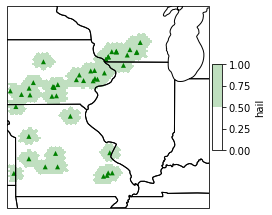

In [24]:
oy.plot.polygons(
    rasterize=True,
    cmap=["white", opts[rpt_type]["color"]],
    backend="matplotlib",
).opts(fig_size=100, alpha=0.25) * scatter * features

:Overlay
   .Image.I     :Image   [x,y]   (x_y hit/miss/fa/null)
   .Scatter.I   :Scatter   [Lon]   (Lat)
   .Coastline.I :Feature   [Longitude,Latitude]
   .States.I    :Feature   [Longitude,Latitude]
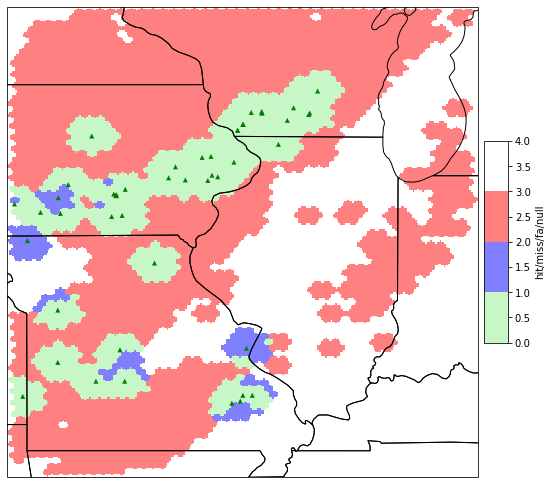

In [25]:
prob_thresh = 1e-9
on = 1 - oy
hit = oy * (fy >= prob_thresh)
miss = oy * (fy < prob_thresh)
correct_null = on * (fy < prob_thresh)
fa = on * (fy >= prob_thresh)
hmfn = hit * 0 + miss * 1 + fa * 2 + correct_null * 3
hmfn.name = "hit/miss/fa/null"

hmfn.plot.polygons(
    rasterize=True,
    cmap=["lightgreen", "blue", "red", "white"],
    clim=(0, 4),
    backend="matplotlib",
).opts(alpha=0.5) * scatter * features